In [93]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Descriptive Statistics

In [96]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('eda_data.csv')

# Summary Statistics: Generate summary statistics for numeric columns.
print('Data Set Info')
print(df.info())
print()
print('Describe Data Set')
print(df.describe())
print()
print('Nunique: Counts number of distinct elements in specified axis. Returns Series with number of distinct elements')
print(df.nunique())


Data Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_pro

In [99]:
# Value Counts: Check the distribution of categorical variables
print('Categorical Varialbes: "Job Title"')
print(df['Job Title'].value_counts())
print()
print()
print('Categorical Varialbes: "Industry"')
print(df['Industry'].value_counts())

Categorical Varialbes: "Job Title"
Job Title
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: count, Length: 264, dtype: int64


Categorical Varialbes: "Industry"
Industry
Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertisin

## Exploratory Visualizations

<Axes: >

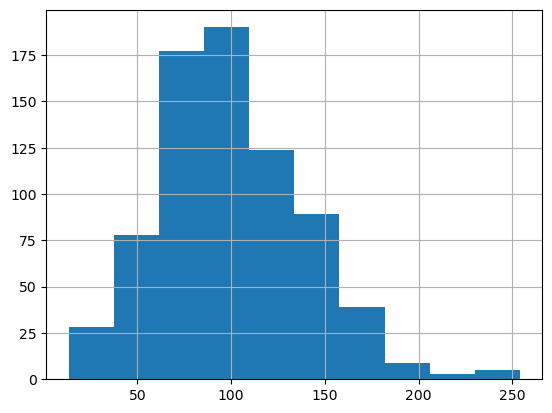

In [101]:
# Histograms and Boxplots: Visualize the distribution of numeric features like salary, rating, and description length.
df['avg_salary'].hist()


<Axes: >

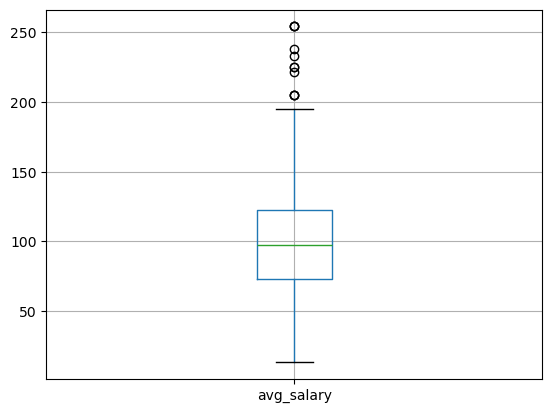

In [103]:
df.boxplot(column=['avg_salary'])

<Axes: >

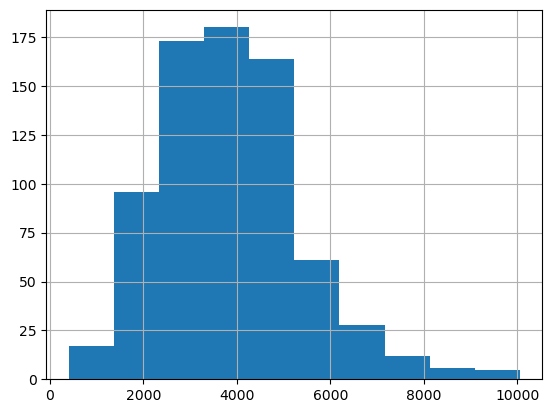

In [106]:
#  Job description length 
df['desc_len'].hist()

# OLD

In [105]:
# Calculate communal and agentic scores
df['communal_score'] = df['cleaned_description'].apply(lambda x: count_words(x, communal_words))
df['agentic_score'] = df['cleaned_description'].apply(lambda x: count_words(x, agentic_words))

# Calculate frequency of communal and agentic words
df['communal_freq'] = df['communal_score'] / df['cleaned_description'].apply(len)
df['agentic_freq'] = df['agentic_score'] / df['cleaned_description'].apply(len)

# Visualization
plt.figure(figsize=(12, 6))
df['communal_score'].plot(kind='hist', alpha=0.5, label='Communal Score', color='blue')
df['agentic_score'].plot(kind='hist', alpha=0.5, label='Agentic Score', color='red')
plt.legend()
plt.xlabel('Score')
plt.title('Distribution of Communal and Agentic Scores in Job Descriptions')
plt.show()

plt.figure(figsize=(12, 6))
df['communal_freq'].plot(kind='hist', alpha=0.5, label='Communal Frequency', color='blue')
df['agentic_freq'].plot(kind='hist', alpha=0.5, label='Agentic Frequency', color='red')
plt.legend()
plt.xlabel('Frequency')
plt.title('Distribution of Communal and Agentic Frequencies in Job Descriptions')
plt.show()

print(df.info())

KeyError: 'cleaned_description'